**IMPORTAÇÕES**


In [758]:
#Instalações
%pip install plotly.express
%pip install plotly
%pip install nbformat 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [759]:
#Importações (nem todas foram usadas)
import pandas as pd
import plotly.express as px
from IPython.display import Image 

**BASE DE DADOS**


In [760]:
##Base limpa (original)
#para cada ano temos 2 colunas na seguinte ordem: (Quantidade(kg), Valor(US$)).
df_vinhos=pd.read_csv('ExpVinho.csv',sep=";")
df_vinhos.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**DEFINIÇÕES E TRATAMENTO DOS DADOS**

In [761]:
##colunas que serão consideradas
df_vinhos.columns[-30:]

Index(['2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1',
       '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1',
       '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1',
       '2020', '2020.1', '2021', '2021.1', '2022', '2022.1'],
      dtype='object')

In [762]:
##quantidade de linhas e colunas
df_vinhos.shape

(128, 108)

In [763]:
##seleção das colunas que serão trabalhadas
df_vinhos_colunas=df_vinhos[
    ['Id','País','2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1',
       '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1',
       '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1',
       '2020', '2020.1', '2021', '2021.1', '2022', '2022.1']
       ]
df_vinhos_colunas.head()

,Id,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,25721,71083,54786,84235,33557,189891,13889,69001,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [764]:
##Tipos de dados
df_vinhos_colunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      128 non-null    int64 
 1   País    128 non-null    object
 2   2008    128 non-null    int64 
 3   2008.1  128 non-null    int64 
 4   2009    128 non-null    int64 
 5   2009.1  128 non-null    int64 
 6   2010    128 non-null    int64 
 7   2010.1  128 non-null    int64 
 8   2011    128 non-null    int64 
 9   2011.1  128 non-null    int64 
 10  2012    128 non-null    int64 
 11  2012.1  128 non-null    int64 
 12  2013    128 non-null    int64 
 13  2013.1  128 non-null    int64 
 14  2014    128 non-null    int64 
 15  2014.1  128 non-null    int64 
 16  2015    128 non-null    int64 
 17  2015.1  128 non-null    int64 
 18  2016    128 non-null    int64 
 19  2016.1  128 non-null    int64 
 20  2017    128 non-null    int64 
 21  2017.1  128 non-null    int64 
 22  2018    128 non-null    in

In [765]:
##Trasforma a coluna "País" em índice.
#df_vinhos_indice=df_vinhos_colunas.set_index('País')
#df_vinhos_indice.head()

In [766]:
#exclusão do índice 'Id'
#exvinhos_15_anos_indice_pais=exvinhos_15_anos_indice_pais.drop(columns=['Id'])

**CRIAÇÃO DE 2 DATA FRAMES: QUANTIDADE E VALOR POR PAÍS**

In [767]:
df_vinhos_colunas.head()

,Id,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,25721,71083,54786,84235,33557,189891,13889,69001,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [768]:
##Transformação da coluna "Id" em índice
#df_vinhos_colunas.reset_index()(acabei não usando)
df_vinhos_indice=df_vinhos_colunas.set_index('Id')
df_vinhos_indice.head(10)

,País,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
Id,,,,,,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
2,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
3,"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
4,Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,...,477,709,345,1065,0,0,0,0,4068,4761
5,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,...,37,191,219,1549,624,1864,805,2268,419,1866
7,Antilhas Holandesas,17938,22908,8235,10651,9810,12808,7335,10188,9247,...,0,0,0,0,0,0,0,0,0,0
8,Argentina,0,0,162,4523,0,0,13253,55460,0,...,15711,59150,0,0,1015,4176,6,13,480,3232
9,Aruba,0,0,0,0,0,0,900,1680,0,...,0,0,0,0,0,0,0,0,0,0


In [769]:
##Confimação das colunas
df_vinhos_indice.columns

Index(['País', '2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011',
       '2011.1', '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015',
       '2015.1', '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019',
       '2019.1', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1'],
      dtype='object')

In [770]:
##Confirmação do índice
df_vinhos_indice.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128],
      dtype='int64', name='Id', length=128)

In [771]:
#tabela separada por quantidade
df_vinhos_qtd=df_vinhos_indice[
    ['País','2008', '2009', '2010', '2011', '2012','2013', '2014', '2015', 
      '2016', '2017', '2018', '2019', '2020', '2021', '2022']
      ]
df_vinhos_qtd.head()

,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Id,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0
3,"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
4,Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [772]:
#Forma dada pela professora para separação das colunas
'''
colunas_valor=[coluna for coluna in df_vinhos.columns  if '.' in coluna]
df_sep_colunas=df_vinhos[['País']+colunas_valor]
df_sep_colunas.head()
'''

"\ncolunas_valor=[coluna for coluna in df_vinhos.columns  if '.' in coluna]\ndf_sep_colunas=df_vinhos[['País']+colunas_valor]\ndf_sep_colunas.head()\n"

In [773]:
#tabela separada por valor
df_vinhos_valor=df_vinhos_indice[
    ['País','2008.1','2009.1','2010.1','2011.1','2012.1','2013.1','2014.1','2015.1',
     '2016.1','2017.1','2018.1','2019.1','2020.1','2021.1','2022.1']
     ]
                                                                                        
df_vinhos_valor.head()

,País,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
Id,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
3,"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
4,Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [774]:
##Criando a coluna "Qtd Total"
df_vinhos_qtd ['Qtd Total']=df_vinhos_qtd ['2008']+df_vinhos_qtd ['2009']\
+df_vinhos_qtd ['2010']+df_vinhos_qtd ['2011']+df_vinhos_qtd ['2012']\
+df_vinhos_qtd ['2013']+df_vinhos_qtd ['2014']+df_vinhos_qtd ['2015']\
+df_vinhos_qtd ['2016']+df_vinhos_qtd ['2017']+df_vinhos_qtd ['2018']\
+df_vinhos_qtd ['2019']+df_vinhos_qtd ['2020']+df_vinhos_qtd ['2021']\
+df_vinhos_qtd ['2022']

df_vinhos_qtd.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\2762702407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Qtd Total
Id,,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11
2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,30
3,"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,909051
4,Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,168868
5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [775]:
#Criação da coluna "Total Valor"
#acredito que essa não é a melhor forma de se fazer em um Data Frame grande.
df_vinhos_valor['Total Valor']=df_vinhos_valor['2008.1']+df_vinhos_valor['2009.1']\
+df_vinhos_valor['2010.1']+df_vinhos_valor['2011.1']+df_vinhos_valor['2012.1']\
+df_vinhos_valor['2013.1']+df_vinhos_valor['2014.1']+df_vinhos_valor['2015.1']\
+df_vinhos_valor['2016.1']+df_vinhos_valor['2017.1']+df_vinhos_valor['2018.1']\
+df_vinhos_valor['2019.1']+df_vinhos_valor['2020.1']+df_vinhos_valor['2021.1']\
+df_vinhos_valor['2022.1']

df_vinhos_valor.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\2256796087.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,País,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total Valor
Id,,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,46
2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,116
3,"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,2546394
4,Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,576189
5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [776]:
df_vinhos_valor.columns

Index(['País', '2008.1', '2009.1', '2010.1', '2011.1', '2012.1', '2013.1',
       '2014.1', '2015.1', '2016.1', '2017.1', '2018.1', '2019.1', '2020.1',
       '2021.1', '2022.1', 'Total Valor'],
      dtype='object')

In [777]:
#Excluindo linhas com Qtd Total ==0
df_vinhos_qtd.drop(df_vinhos_qtd.loc[df_vinhos_qtd['Qtd Total']==0].index, inplace=True)
#ordenando valores
df_vinhos_qtd=df_vinhos_qtd.sort_values(by='Qtd Total', ascending=False)
df_vinhos_qtd.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\1491182035.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Qtd Total
Id,,,,,,,,,,,,,,,,,
106,Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,39029799
98,Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,29214770
49,Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,3563355
29,China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,2509458
48,Espanha,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,1993000


In [778]:
#Excluindo linhas com Total Valor ==0
df_vinhos_valor.drop(df_vinhos_valor.loc[df_vinhos_valor['Total Valor']==0].index, inplace=True)
#ordenando valores
df_vinhos_valor=df_vinhos_valor.sort_values(by='Total Valor', ascending=False)
df_vinhos_valor.head()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\3477093239.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,País,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total Valor
Id,,,,,,,,,,,,,,,,,
98,Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,38719031
106,Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,25504484
49,Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,9684567
29,China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,4746525
104,Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,4711464


***ORDENANDO E FAZENDO AS CONFIGURAÇÕES FINAIS
PAÍS ORIGEM /PAÍS DESTINO/ QUANTIDADE EM LITROS / VALOR EM US$***

In [779]:
#unificação dos data frames com 'merge'.
df_vinhos_unificado=pd.merge(df_vinhos_qtd, df_vinhos_valor, on='País', how='left')
df_vinhos_unificado.head()

,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,Total Valor
0,Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,...,61440,18240,0,0,0,0,8550,312926,118618,25504484
1,Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,...,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,38719031
2,Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,...,494216,524109,687411,1523699,512519,616274,610793,203554,447893,9684567
3,China,8689,1553416,795,54156,87905,40929,64040,47609,134106,...,455340,222866,499622,266086,126336,376828,363000,264116,404647,4746525
4,Espanha,2942,2181,0,5206,0,1972980,0,0,0,...,0,0,0,0,22631,1353,126,0,0,3808552


In [780]:
df_vinhos_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         117 non-null    object
 1   2008         117 non-null    int64 
 2   2009         117 non-null    int64 
 3   2010         117 non-null    int64 
 4   2011         117 non-null    int64 
 5   2012         117 non-null    int64 
 6   2013         117 non-null    int64 
 7   2014         117 non-null    int64 
 8   2015         117 non-null    int64 
 9   2016         117 non-null    int64 
 10  2017         117 non-null    int64 
 11  2018         117 non-null    int64 
 12  2019         117 non-null    int64 
 13  2020         117 non-null    int64 
 14  2021         117 non-null    int64 
 15  2022         117 non-null    int64 
 16  Qtd Total    117 non-null    int64 
 17  2008.1       117 non-null    int64 
 18  2009.1       117 non-null    int64 
 19  2010.1       117 non-null    

In [781]:
df_vinhos_totais=df_vinhos_unificado[['País','Qtd Total', 'Total Valor']]
df_vinhos_totais.head()

,País,Qtd Total,Total Valor
0,Rússia,39029799,25504484
1,Paraguai,29214770,38719031
2,Estados Unidos,3563355,9684567
3,China,2509458,4746525
4,Espanha,1993000,3808552


In [782]:
#Ciação da coluna 'País de Origem'
df_vinhos_totais['País de origem']=df_vinhos_totais.index
df_vinhos_totais.head()                                                                                                                  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\1248545389.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,País,Qtd Total,Total Valor,País de origem
0,Rússia,39029799,25504484,0
1,Paraguai,29214770,38719031,1
2,Estados Unidos,3563355,9684567,2
3,China,2509458,4746525,3
4,Espanha,1993000,3808552,4


In [783]:
#Substituindo os nomes dos país na coluna "País de origem" por 'Brasil'
#df_vinhos_totais =df_vinhos_totais [['País de origem','País','Qtd Total','Total Valor']]
#df_vinhos_totais ['País de origem']=df_vinhos_totais ['País de origem'].apply(lambda x: 'Brasil' if x=='sim'else 'Brasil')
df_vinhos_totais.head()

,País,Qtd Total,Total Valor,País de origem
0,Rússia,39029799,25504484,0
1,Paraguai,29214770,38719031,1
2,Estados Unidos,3563355,9684567,2
3,China,2509458,4746525,3
4,Espanha,1993000,3808552,4


In [784]:
#Renomeando as colunas e ordenando
df_vinhos_totais.rename(columns={'País': 'País de destino'}, inplace=True)
df_vinhos_totais.rename(columns={'Qtd Total': 'Qtd Total (L)'}, inplace=True)
df_vinhos_totais.rename(columns={'Total Valor': 'Valor Total (US$)'}, inplace=True)
df_vinhos_totais=df_vinhos_totais.sort_values(by='Valor Total (US$)', ascending=False)
df_vinhos_totais.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\1720829448.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\1720829448.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20004\1720829448.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,País de destino,Qtd Total (L),Valor Total (US$),País de origem
1,Paraguai,29214770,38719031,1
0,Rússia,39029799,25504484,0
2,Estados Unidos,3563355,9684567,2
3,China,2509458,4746525,3
6,Reino Unido,1239551,4711464,6


In [785]:
#Formatação da coluna (opção 2)
#df_vinhos_totais['Valor Total (US$)']=df_vinhos_totais['Valor Total (US$)'].apply(lambda x: '{:,.2f}'.format (x).replace (',',','))
#df_vinhos_totais['Qtd Total (L)']=df_vinhos_totais['Qtd Total (L)'].apply(lambda x: '{:,.2f}'.format (x).replace ('.','.'))
df_grafico_barras=df_vinhos_totais.head()
df_grafico_barras=df_grafico_barras.set_index('País de destino')
df06=df_grafico_barras.T
df06

País de destino,Paraguai,Rússia,Estados Unidos,China,Reino Unido
Qtd Total (L),29214770,39029799,3563355,2509458,1239551
Valor Total (US$),38719031,25504484,9684567,4746525,4711464
País de origem,1,0,2,3,6


**PREPARAÇÃO PARA A PLOTAGEM DOS GRÁFICOS**

In [786]:
'''fig = px.bar(df06, x=df06.index, y="'Paraguai, Rússia'",  barmode="group",template='plotly_white')
fig.update_layout(title='Comparativo entre valor total e quantidade(L) total exportada.', width = 800)
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Valor")
fig.show()'''

'fig = px.bar(df06, x=df06.index, y="\'Paraguai, Rússia\'",  barmode="group",template=\'plotly_white\')\nfig.update_layout(title=\'Comparativo entre valor total e quantidade(L) total exportada.\', width = 800)\nfig.update_xaxes(title_text="Ano")\nfig.update_yaxes(title_text="Valor")\nfig.show()'

In [787]:
##Transformar as colunas numéricas em float ou int( voltei para a foamatação original pq houve alteração nos valores(arredondamento))
'''
exvinhos_15_anos_qtd_e_valor['Qtd Total (L)']=exvinhos_15_anos_qtd_e_valor['Qtd Total (L)'].astype(int)
exvinhos_15_anos_qtd_e_valor['Valor Total (US$)']=exvinhos_15_anos_qtd_e_valor['Valor Total (US$)'].astype(int)
'''
df_vinhos_totais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 1 to 116
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   País de destino    117 non-null    object
 1   Qtd Total (L)      117 non-null    int64 
 2   Valor Total (US$)  117 non-null    int64 
 3   País de origem     117 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.6+ KB


In [788]:
#Gráfico quantidade
grafico=px.bar(df_vinhos_totais.head(10), x='País de destino', y='Qtd Total (L)',template='plotly_white',
               title='Total exportado em litros',width = 800)
grafico.show()

In [789]:
#Gráfico valor
grafico=px.bar(df_vinhos_totais.head(10), x='País de destino', y='Valor Total (US$)',template='plotly_white',
               title= 'Total exportado em US$',width = 800)
grafico.show()

In [790]:
df_vinhos_totais.describe()


,Qtd Total (L),Valor Total (US$),País de origem
count,1.170000e+02,1.170000e+02,117.000000
mean,7.519866e+05,9.627719e+05,58.000000
std,4.494890e+06,4.389615e+06,33.919021
min,2.000000e+00,4.000000e+00,0.000000
25%,3.600000e+02,1.390000e+03,29.000000
50%,9.799000e+03,3.376700e+04,58.000000
75%,7.610600e+04,2.624520e+05,87.000000
max,3.902980e+07,3.871903e+07,116.000000


In [791]:
#Manipulação para fazer o gráfico de linha
df_grafico_linhas_qtd=df_vinhos_qtd.set_index('País')
df_grafico_linhas_qtd=df_grafico_linhas_qtd.drop('Qtd Total', axis=1)
df_grafico_linhas_qtd.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395
Espanha,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0


In [792]:
#Manipulação para fazer os gráficos
df_quantidade=df_grafico_linhas_qtd.head()
df_quantidade=df_quantidade.T
df_quantidade.head()

País,Rússia,Paraguai,Estados Unidos,China,Espanha
2008,6207658,2191901,443895,8689,2942
2009,21912914,486927,372319,1553416,2181
2010,0,510989,228968,795,0
2011,0,240168,306787,54156,5206
2012,4528176,354824,146585,87905,0


In [793]:
#Gráfico de linha Quantidade Rússia
fig =px.line(df_quantidade,  x=df_quantidade.index, y='Rússia',markers=True,template='plotly_white',
             title='Quantidade em litros de vinhos exportados a Rússia',width = 800)
fig.show()

In [794]:
#Gráfico de linha Quantidade Paraguai
fig =px.line(df_quantidade,  x=df_quantidade.index, y='Paraguai',markers=True,template='plotly_white',
             title='Quantidade em litros de vinhos exportados ao Paraguai',width = 800)
fig.show()

In [795]:
#Gráfico de linha Quantidade Estados Unidos
fig =px.line(df_quantidade,  x=df_quantidade.index, y='Estados Unidos',markers=True,template='plotly_white',
             title='Quantidade em litros de vinhos exportados aos Estados Unidos',width = 800)
fig.show()

In [796]:
#Gráfico de linha Quantidade 5 maiores
fig =px.line(df_quantidade,  x=df_quantidade.index, y=df_quantidade.columns,markers=True,template='plotly_white',
             title='Quantidade em litros de vinhos exportados aos 5 maiores importadores',width = 800)
fig.show()

In [797]:
#Manipulação para fazer o gráfico de linha
df_grafico_linhas_valor=df_vinhos_valor.set_index('País')
df_grafico_linhas_valor=df_grafico_linhas_valor.drop('Total Valor', axis=1)
df_grafico_linhas_valor.head()

,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154


In [798]:
#Alterando o nome das colunas para que o eixo x seja representado de forma correta.
df_grafico_linhas_valor.rename(columns={'2008.1': '2008'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2009.1': '2009'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2010.1': '2010'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2011.1': '2011'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2012.1': '2012'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2013.1': '2013'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2014.1': '2014'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2015.1': '2015'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2016.1': '2016'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2017.1': '2017'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2018.1': '2018'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2019.1': '2019'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2020.1': '2020'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2021.1': '2021'}, inplace=True)
df_grafico_linhas_valor.rename(columns={'2022.1': '2022'}, inplace=True)

df_grafico_linhas_valor.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154


In [799]:
#Manipulação para fazer os gráficos
df_valor=df_grafico_linhas_valor.head()
df_valor=df_valor.T
df_valor.head()

País,Paraguai,Rússia,Estados Unidos,China,Reino Unido
2008,1374088,2352768,804607,25926,155076
2009,392087,5732280,660066,482400,68788
2010,449197,0,478630,2358,295690
2011,276281,0,1030254,334867,285642
2012,428279,2103968,303986,642177,334856


In [800]:
#Gráfico de linha Valor Paraguai
fig =px.line(df_valor,  x=df_valor.index, y='Paraguai',markers=True,template='plotly_white',
             title='Totais em US$ de vinhos exportados ao Paraguai',width = 800)
fig.show()

In [801]:
#Gráfico de linha Valor Rússia
fig =px.line(df_valor,  x=df_valor.index, y='Rússia',markers=True,template='plotly_white',
             title='Totais em US$ de vinhos exportados a Rússia',width = 800)
fig.show()

In [802]:
#Gráfico de linha Valor Estados Unidos
fig =px.line(df_valor,  x=df_valor.index, y='Estados Unidos',markers=True,template='plotly_white',
             title='Totais em US$ de vinhos exportados aos Estados Unidos',width = 800)
fig.show()

In [803]:
#Gráfico de linha Valor 5 maiores
fig =px.line(df_valor,  x=df_valor.index, y=df_valor.columns,markers=True,template='plotly_white',
             title='Totais em US$ de vinhos exportados aos 5 maiores importadores',width = 800)
fig.show()

In [804]:
df_totais_pais=df_vinhos_totais.drop(columns=('País de origem'))
df_totais_pais.head()

,País de destino,Qtd Total (L),Valor Total (US$)
1,Paraguai,29214770,38719031
0,Rússia,39029799,25504484
2,Estados Unidos,3563355,9684567
3,China,2509458,4746525
6,Reino Unido,1239551,4711464


In [805]:
#Tratando os dados para montar o gráfico de linhas com as quantidades e valores no período
df_qtd_total_ano=df_grafico_linhas_qtd.sum()
df_qtd_total_ano=pd.DataFrame(df_qtd_total_ano)
df_qtd_total_ano.head()
df1=df_qtd_total_ano.reset_index()
df1.index.rename('novo', inplace=True)
df1.head()

,index,0
novo,,
0,2008,10346323
1,2009,25514198
2,2010,1280574
3,2011,1214834
4,2012,5775376


In [806]:
#Tratando os dados para montar o gráfico de linhas com as quantidades e valores no período
df_valor_total_ano=df_grafico_linhas_valor.sum()
df_valor_total_ano=pd.DataFrame(df_valor_total_ano)
df_valor_total_ano.head()
df2=df_valor_total_ano.reset_index()
df2.index.rename('novo', inplace=True)
df2.head()

,index,0
novo,,
0,2008,7118100
1,2009,8940988
2,2010,2595303
3,2011,3615120
4,2012,5521293


In [807]:
#Tratando os dados para montar o gráfico de linhas com as quantidades e valores no período
df3=pd.merge(df1,df2, on='novo', how='left')
df3=df3.drop('index_y', axis=1)
df3.head()

,index_x,0_x,0_y
novo,,,
0,2008,10346323,7118100
1,2009,25514198,8940988
2,2010,1280574,2595303
3,2011,1214834,3615120
4,2012,5775376,5521293


In [808]:
#Tratando os dados para montar o gráfico de linhas com as quantidades e valores no período
df3.rename(columns={'index_x':'Ano'}, inplace=True)
df3.rename(columns={'0_x':'Quantidade'}, inplace=True)
df3.rename(columns={'0_y':'Valor'}, inplace=True)
df3=df3
df3=df3.set_index('Ano')

In [809]:
#Gráfico de linhas demonstrando a quantidade e o valor exportado do período
fig =px.line(df3, x=df3.index ,y=df3.columns,markers=True,template='plotly_white',
             title='Exportações brasileiras por período.',width = 800)              
fig.show()

In [810]:
#Gráfico de barras demonstrando o valor exportado do período
fig=px.bar(df3 ,y=df3['Valor'],template='plotly_white',
             title='Quantidade e valor total exportado',width = 800)
                
fig.show()

In [811]:
fig = px.bar(df3, x=df3.index, y=df3.columns, barmode="group",template='plotly_white')
fig.update_layout(title='Quantidade e valor total exportado.(2008 a 2022)', width = 800)
fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Valor")
fig.show()

In [812]:
fig=px.scatter(df_vinhos_totais,  x='Qtd Total (L)', y='Valor Total (US$)', 
               log_x=True, log_y=True,width = 800, opacity=0.8, template='plotly_white')
fig.update_traces(marker = dict(size =8, line=dict(width = 1)), selector = dict(mode = 'markers'))
fig.update_layout(title='Dispersão das exportações no período.')
fig.update_xaxes(title='Quantidade')
fig.update_yaxes(title='Valor')
fig.show()

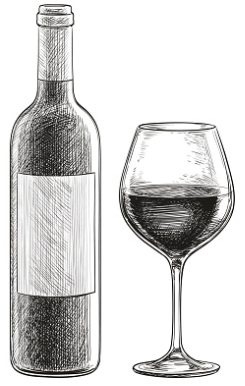

In [813]:
#Imagem seria utilizada no Streamlit
Image(filename= "Garrafa vinho.png") 